In [15]:
def modexp(b, e, m): # e as a string showing the binary digits
    if m==1:
        return 0;
    c=0
    d=1
    for e_i in e:
        c *= 2
        d = d*d%m
        if e_i=='1':
            c += 1
            d = d*b%m
    return d

https://officeguide.cc/python-pycryptodome-rsa-asymmetric-encryption-tutorial-examples/

In [1]:
from Crypto.PublicKey import RSA

# 產生 2048 位元 RSA 金鑰
key = RSA.generate(2048)

# RSA 私鑰
privateKey = key.export_key()
with open("private.pem", "wb") as f:
    f.write(privateKey)

# RSA 公鑰
publicKey = key.publickey().export_key()
with open("public.pem", "wb") as f:
    f.write(publicKey)

In [7]:
key.publickey()

RsaKey(n=20848842114161197946096044237963290256887266503265560301922434262344719599277755953426488739304512986408717195132687531499049337393744053888566568755380053978023422180029523210919465772226643434999984058799748582518193373128616142610138201826305767475369298307582818755984872659388957132524976927814975008435901716992458341465388211917864985255272018477604280242033829143194271300218350320083037370285944012220928459715002950954780228525766579120398900154421976888955799559096115321931336802721183698950762288756712181712120637261822057782475723962807256363501930268644128174374968505584092641815241054262244330171329, e=65537)

In [1]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import PKCS1_OAEP

# 要加密的資料（必須為 bytes）
data = b'Hello'

# 產生 2048 位元 RSA 金鑰
privateKey = RSA.generate(2048)

# RSA 公鑰
publicKey = privateKey.publickey()

# 以 RSA 金鑰加密
cipherRSA = PKCS1_OAEP.new(publicKey)
ciphertext = cipherRSA.encrypt(data)

# 將加密結果寫入檔案
with open("encrypted_data.bin", "wb") as f:
    f.write(ciphertext)

In [26]:
# 解密

#from Crypto.PublicKey import RSA
#from Crypto.Cipher import PKCS1_OAEP

# 從檔案讀取加密資料
with open("encrypted_data.bin", "rb") as f:
    ciphertext = f.read()

# 以 RSA 金鑰解密
cipherRSA = PKCS1_OAEP.new(privaeKey)
data = cipherRSA.decrypt(ciphertext)

# 輸出解密後的資料
print(data.decode("utf-8"))

Hello


In [6]:
print(privateKey.d)
print(privateKey.e)
print(privateKey.n)
print(privateKey.p)
print(privateKey.q)

4183716896242494973698257305707564290130297591699373376198584527479076885584686869484807694327719722842724521850715588707540758151910705245911157024254625246808536545691285556478962362909459566702318978735566405774982051566962166620926780637301528651707185111658048419243160878948625132826931084001342995189658302854651108591497820585438623819709552613738848050061171142729527055257216281285061679304344720012895310607348365533360272303402295740374465312046000075898000644332149501756984800790063229923728605579673997610237826144059780503941505156732215612948796320366802414215480971255584548207226162487654249195001
65537
26798441502130126872038575872956716110274086230484467864528821206802156267464557822941488722392197378287019204274089579937066770952623944651446952831801336539128286135461054734394932940233323718220190481297250211139617721110687534949487213275358479523719277785538143894046721841729565100921524942793922286639103908171288508598991182351747955713818984318687012665197670150254727

In [12]:
import sys
print(sys.getsizeof(privateKey))
print(sys.getsizeof(privateKey.d))
print(sys.getsizeof(privateKey.e))
print(sys.getsizeof(privateKey.n))
print(sys.getsizeof(privateKey.p))
print(sys.getsizeof(privateKey.q))


48
300
28
300
164
164


In [7]:
import matplotlib.pyplot as plt

In [13]:
import time

In [17]:
time.time()

1642012102.955325

In [25]:
sys.getsizeof(b'Hello')

38

In [23]:
time.localtime()

time.struct_time(tm_year=2022, tm_mon=1, tm_mday=13, tm_hour=2, tm_min=30, tm_sec=11, tm_wday=3, tm_yday=13, tm_isdst=0)

In [1]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import PKCS1_OAEP
import time, sys

In [2]:
def RSAKeyGen(keysize):
    t = time.time()
    key = RSA.generate(keysize)
    t = time.time() - t
    publicKey = key.publickey()
    ttlsize = sys.getsizeof(key.export_key())
    sendsize = sys.getsizeof(publicKey.export_key())
    return key, publicKey, t, ttlsize, sendsize

In [3]:
def RSAEncrypt(datasize, publicKey, plaintext):
    data = plaintext[:datasize]
    t = time.time()
    cipherRSA = PKCS1_OAEP.new(publicKey)
    ciphertext = cipherRSA.encrypt(data)
    t = time.time() - t
    return ciphertext, t

In [4]:
def RSADecrypt(cipher, key):
    t = time.time()
    cipherRSA = PKCS1_OAEP.new(key)
    data = cipherRSA.decrypt(cipher)
    t = time.time() - t
    return data, t

In [5]:
plaintext = b'Hello'
BitSize = [8, 16, 24, 32, 40]
keySize = [1413, 1745, 2800, 3200, 3800]
TimesEnc = []
TimesDec = []
Timeskeygen = []

for nd, nk in enumerate(keySize, start=1):
    key, publicKey, t_gen, ttlsize, sendsize = RSAKeyGen(nk)
    ciphertext, t_enc = RSAEncrypt(nd, publicKey, plaintext)
    data, t_dec = RSADecrypt(ciphertext, key)
    print(data)
    TimesEnc.append(t_gen)
    TimesDec.append(t_enc)
    Timeskeygen.append(t_dec)

b'H'
b'He'
b'Hel'
b'Hell'
b'Hello'


In [9]:
Timekeygen

[0.002341747283935547,
 0.0025947093963623047,
 0.0072231292724609375,
 0.0058231353759765625,
 0.008190155029296875]

In [16]:
list(enumerate(keySize, start=1))

[(1, 1413), (2, 1745), (3, 2800), (4, 3200), (5, 3800)]

In [83]:
keyRSA = RSA.generate(2048)

In [86]:
keyRSA.n

30641483041036444255965507103893973726515359830083084511749848464110143556050171744927229502247280789360236660760488876341395839854388672781760291656884240881396295592940904966152786814428017805232336006184860711980912560963225397322614707028069862711546038582198013924404799676399995458270477784394831341900122421271089443203021933590191579980033057817113129240627291915202188523975558242805840904326730594385337078935780920474663913008884128412796598529548315859093583050333321793464011673955782184458801534373426422649508254767944725043559943778988320076484549734339077667112283731247535312545602427467749929450031

In [85]:
key.p

AttributeError: 'RSAKey' object has no attribute 'p'

In [8]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import PKCS1_OAEP
import time, sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def modexp(b, e, m): # e as a string showing the binary digits
    if m==1:
        return 0;
    c=0
    d=1
    for e_i in e:
        c *= 2
        d = d*d%m
        if e_i=='1':
            c += 1
            d = d*b%m
    return d

def RSAKeyGen(keysize):
    print("\tGenerating the key")
    t = time.time()
    key = RSA.generate(keysize)
    t = time.time() - t
    publicKey = key.publickey()
    ttlsize = sys.getsizeof(key.export_key())
    sendsize = sys.getsizeof(publicKey.export_key())
    return key, publicKey, t, ttlsize, sendsize
    
def RSAEncrypt(datasize, publicKey, plaintext):
    print("\tEncrypting")
    data = plaintext[:datasize]
    t = time.time()
    cipherRSA = PKCS1_OAEP.new(publicKey)
    ciphertext = cipherRSA.encrypt(data)
    t = time.time() - t
    return ciphertext, t
    
def RSADecrypt(cipher, key):
    print("\tdecrypting")
    t = time.time()
    cipherRSA = PKCS1_OAEP.new(key)
    data = cipherRSA.decrypt(cipher)
    t = time.time() - t
    return data, t

plaintext = b'Hello'
BitSize = [8, 16, 24, 32, 40]
keySize = [1413, 1745, 2800, 3200, 3800]
values = ['8bit', '16bit', '24bit', '32bit','40bit']

# values for ntru
N_NTRU = [167, 443, 491, 593, 743]
TimesEnc_NTRU = [0.155, 0.154, 0.15, 0.14, 0.15]
TimesDec_NTRU = [0.21, 0.21, 0.22, 0.21, 0.22]
Timekeygen_NTRU = [1.5, 3.5, 15, 25.7, 35]
hPluscipher_NTRU = [1750, 2550, 3040, 3319, 3851]
TotalSize_NTRU = [3000, 4145, 5400, 6000, 7000]

# values for rsa
N_RSA = [251, 401, 443, 491, 593, 743]
keySize_N_RSA = [1024, 2048, 3072, 4096, 7680, 15360]
TimesEnc_RSA = []
TimesDec_RSA = []
Timeskeygen_RSA = []
Deliver_RSA = []
TotalSize_RSA = []

# Encrypt/Decrypt time to data size
print("Encrypt/Decrypt time to data size")
for nd in range(1, 6):
    print("size:{}".format(nd))
    key, publicKey, t_gen, ttlsize, sendsize = RSAKeyGen(2048)
    ciphertext, t_enc = RSAEncrypt(nd, publicKey, plaintext)
    data, t_dec = RSADecrypt(ciphertext, key)
    if data != plaintext[:nd]:
        raise Exception("decrypted plaintext does not match")
    TimesEnc_RSA.append(t_enc)
    TimesDec_RSA.append(t_dec)

# Key generating time to key size
print("Key generating time to key size")
for nk in keySize:
    print("size:{}".format(nk))
    key, publicKey, t_gen, ttlsize, sendsize = RSAKeyGen(nk)
    Timeskeygen_RSA.append(t_gen)
'''
# Deliver size and key size to N
print("Deliver size and key size to N")
for nk in keySize_N_RSA:
    print("size:{}".format(nk))
    key, publicKey, t_gen, ttlsize, sendsize = RSAKeyGen(nk)
    ciphertext, t_enc = RSAEncrypt(5, publicKey, plaintext)
    Deliver_RSA.append(sendsize+sys.getsizeof(ciphertext))
    TotalSize_RSA.append(ttlsize)
'''

Encrypt/Decrypt time to data size
size:1
	Generating the key
	Encrypting
	decrypting
size:2
	Generating the key
	Encrypting
	decrypting
size:3
	Generating the key
	Encrypting
	decrypting
size:4
	Generating the key
	Encrypting
	decrypting
size:5
	Generating the key
	Encrypting
	decrypting
Key generating time to key size
size:1413
	Generating the key
size:1745
	Generating the key
size:2800
	Generating the key
size:3200
	Generating the key
size:3800
	Generating the key
Deliver size and key size to N
size:1024
	Generating the key
	Encrypting
size:2048
	Generating the key
	Encrypting
size:3072
	Generating the key
	Encrypting
size:4096
	Generating the key
	Encrypting
size:7680
	Generating the key
	Encrypting
size:15360
	Generating the key
	Encrypting


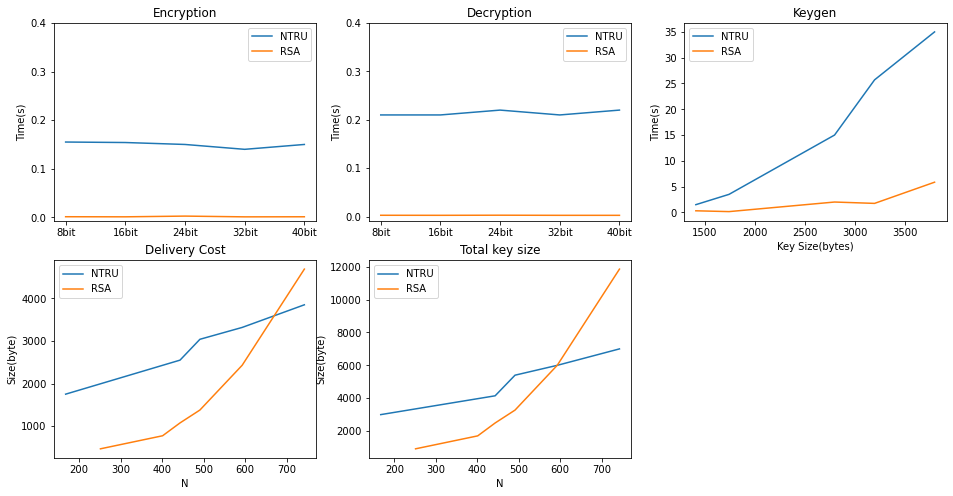

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(2, 3, 1)
plt.plot(BitSize, TimesEnc_NTRU, label="NTRU")
plt.plot(BitSize, TimesEnc_RSA, label="RSA")
plt.title("Encryption")
plt.ylabel("Time(s)") # y label
plt.xticks(BitSize, values)
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(BitSize, TimesDec_NTRU, label="NTRU")
plt.plot(BitSize, TimesDec_RSA, label="RSA")
plt.title("Decryption")
plt.ylabel("Time(s)") # y label
plt.xticks(BitSize, values)
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(keySize, Timekeygen_NTRU, label="NTRU")
plt.plot(keySize, Timeskeygen_RSA, label="RSA")
plt.title("Keygen")
plt.xlabel("Key Size(bytes)") 
plt.ylabel("Time(s)") 
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(N_NTRU, hPluscipher_NTRU, label="NTRU")
plt.plot(N_RSA, Deliver_RSA, label="RSA")
plt.title("Delivery Cost")
plt.xlabel("N")
plt.ylabel("Size(byte)") # y label
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(N_NTRU, TotalSize_NTRU, label="NTRU")
plt.plot(N_RSA, TotalSize_RSA, label="RSA")
plt.title("Total key size")
plt.xlabel("N")
plt.ylabel("Size(byte)") # y label
plt.legend()

plt.savefig('result-ntru-rsa.png')
plt.show()

In [10]:
# testing the size of the 
keysattr = [] # n, e, d, p, q

for nk in keySize:
    print("size:{}".format(nk))
    key, publicKey, t_gen, ttlsize, sendsize = RSAKeyGen(nk)
    keysattr.append([key.n, key.e, key.d, key.p, key.q])

size:1413
	Generating the key
size:1745
	Generating the key
size:2800
	Generating the key
size:3200
	Generating the key
size:3800
	Generating the key


In [21]:
[(k[0].bit_length(), k[3].bit_length(), k[4].bit_length()) for k in keysattr]

[(1413, 706, 707),
 (1745, 872, 873),
 (2800, 1400, 1400),
 (3200, 1600, 1600),
 (3800, 1900, 1900)]

In [69]:
[k[1] for k in keysattr]

[65537, 65537, 65537, 65537, 65537]

In [23]:
((2**705)*2-1).bit_length()

706

In [11]:
(65537).bit_length()

17

In [8]:
time.time()

1642101165.267058

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import PKCS1_OAEP
import time, sys, random, math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
# Large Prime Generation for RSA
# Pre generated primes
first_primes_list = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29,
					31, 37, 41, 43, 47, 53, 59, 61, 67,
					71, 73, 79, 83, 89, 97, 101, 103,
					107, 109, 113, 127, 131, 137, 139,
					149, 151, 157, 163, 167, 173, 179,
					181, 191, 193, 197, 199, 211, 223,
					227, 229, 233, 239, 241, 251, 257,
					263, 269, 271, 277, 281, 283, 293,
					307, 311, 313, 317, 331, 337, 347, 349]

def nBitRandom(n):
	return random.randrange(2**(n-1)+1, 2**n - 1)

def getLowLevelPrime(n):
	'''Generate a prime candidate divisible
	by first primes'''
	while True:
		# Obtain a random number
		pc = nBitRandom(n)

		# Test divisibility by pre-generated
		# primes
		for divisor in first_primes_list:
			if pc % divisor == 0 and divisor**2 <= pc:
				break
		else: return pc

def isMillerRabinPassed(mrc):
	'''Run 20 iterations of Rabin Miller Primality test'''
	maxDivisionsByTwo = 0
	ec = mrc-1
	while ec % 2 == 0:
		ec >>= 1
		maxDivisionsByTwo += 1
	assert(2**maxDivisionsByTwo * ec == mrc-1)

	def trialComposite(round_tester):
		if pow(round_tester, ec, mrc) == 1:
			return False
		for i in range(maxDivisionsByTwo):
			if pow(round_tester, 2**i * ec, mrc) == mrc-1:
				return False
		return True

	# Set number of trials here
	numberOfRabinTrials = 20
	for i in range(numberOfRabinTrials):
		round_tester = random.randrange(2, mrc)
		if trialComposite(round_tester):
			return False
	return True

def getRandomPrime(n):
	while True:
		prime_candidate = getLowLevelPrime(n)
		if not isMillerRabinPassed(prime_candidate):
			continue
		else:
			print(n, "bit prime is: \n", prime_candidate)
			return prime_candidate
            

In [2]:
def getRandomPrime(n):
    t = time.time()
    exams = []
    mini = 2**(n-1)
    maxi = mini*2
    while len(exams) < mini:
        num = random.randrange(mini+1, maxi, 2)
        if num in exams:
            continue
        prime = True
        for i in range(3, int(num**0.5)+1, 2):
            if not num%i:
                exams.append(num)
                prime = False
                break
            if time.time() - t > 600:
                print(f"Tested {len(exams)} numbers.\nCurrent num: {num}\nCurrent i: {i}\n")
                t = time.time()
        if prime:
            return num

In [3]:
class RSAKey:
    def __init__(self, n, e, *args):
        self.n = n
        self.e = e
        if len(args)==1:
            self.d = args[0]

def modexp(b, e, m): # e as AN INTEGER
    if m==1:
        return 0;
    c=0
    d=1
    for e_i in map(int, bin(e)[2:]):
        c *= 2
        d = d*d%m
        if e_i:
            c += 1
            d = d*b%m
    return d

def findprime(primesize):
    mini = 2**(primesize-1)+1
    maxi = 2*mini
    numlist = list(range(mini, maxi, 2))
    random.shuffle(numlist)
    for n in numlist:     # when not all numbers are examined
        for x in range(3, int(n**0.5)):   # check if x can be divided by n
            if n % x == 0:      # if true then n is not prime
                break
        else:                   # if x is found after exhausting all values of x
            yield n             # generate the prime

def modinv(a,m):
    a0 = a
    m0 = m
    prevx,x=1,0
    prevy,y=0,1
    while m:
        q = a//m
        x, prevx = prevx - q*x, x
        y, prevy = prevy - q*y, y
        a, m = m, a % m
    if a != 1:
        raise ValueError
    print("e*d mod r =", a0*prevx%m0)
    return prevx%m0          
            
def RSAKeyGen(keysize):
    print("\tGenerating the key")
    t = time.time()
    
    psize = keysize//2
    qsize = keysize - psize
    p = getRandomPrime(psize)
    q = getRandomPrime(qsize)
    n = p*q
    r = (p-1)*(q-1)
    
    e = 65537
    d = modinv(e, r)
    
    t = time.time() - t
    key = RSAKey(n, e, d)
    publicKey = RSAKey(n, e)
    #ttlsize = sys.getsizeof(key.export_key())
    #sendsize = sys.getsizeof(publicKey.export_key())
    return key, publicKey, t #, ttlsize, sendsize

def RSAEncrypt(datasize, publicKey, plaintext):
    print("\tEncrypting")
    data = plaintext[:datasize]
    t = time.time()
    m = int.from_bytes(data, 'big')
    print(m)
    c = modexp(m, publicKey.e, publicKey.n)
    ciphertext = c.to_bytes(int(math.log(c, 2))//8+1, 'big')
    t = time.time() - t
    return c, t
    
def RSADecrypt(cipher, key):
    print("\tDecrypting")
    t = time.time()
    #c = int.from_bytes(cipher, 'big')
    c = cipher
    m = modexp(c, key.d, key.n)
    data = m.to_bytes(int(math.log(m, 2))//8+1, 'big')
    t = time.time() - t
    return data, t


In [4]:
plaintext = b'Hello'
BitSize = [8, 16, 24, 32, 40]
keySize = [1413, 1745, 2800, 3200, 3800]
values = ['8bit', '16bit', '24bit', '32bit','40bit']

# values for ntru
N_NTRU = [167, 443, 491, 593, 743]
TimesEnc_NTRU = [0.155, 0.154, 0.15, 0.14, 0.15]
TimesDec_NTRU = [0.21, 0.21, 0.22, 0.21, 0.22]
Timekeygen_NTRU = [1.5, 3.5, 15, 25.7, 35]
hPluscipher_NTRU = [1750, 2550, 3040, 3319, 3851]
TotalSize_NTRU = [3000, 4145, 5400, 6000, 7000]

# values for rsa
N_RSA = [251, 401, 443, 491, 593]
keySize_N_RSA = [1024, 2048, 3072, 4096, 7680]
TimesEnc_RSA = []
TimesDec_RSA = []
Timeskeygen_RSA = []
Deliver_RSA = []
TotalSize_RSA = []

In [ ]:
# Encrypt/Decrypt time to data size
for nd in range(1, 6):
    key, publicKey, t_gen = RSAKeyGen(2048)
    ciphertext, t_enc = RSAEncrypt(nd, publicKey, plaintext)
    data, t_dec = RSADecrypt(ciphertext, key)
    if data != plaintext[:nd]:
        raise Exception("decrypted plaintext does not match")
    TimesEnc_RSA.append(t_enc)
    TimesDec_RSA.append(t_dec)

# Key generating time to key size
for nk in keySize:
    key, publicKey, t_gen = RSAKeyGen(nk)
    Timeskeygen_RSA.append(t_gen)


	Generating the key
Tested 45 numbers.
Current num: 91971075058897704029012332135336251449801292137733953595142619372659015103012721310920964768884618783734004635307430001524468932267143428995267339328966979930912883691406727978807743890870670293506290801396328508691662706875314747553899596364115327178199145621827661633353818577969569654419852699065225369281
Current i: 125396571

Tested 45 numbers.
Current num: 91971075058897704029012332135336251449801292137733953595142619372659015103012721310920964768884618783734004635307430001524468932267143428995267339328966979930912883691406727978807743890870670293506290801396328508691662706875314747553899596364115327178199145621827661633353818577969569654419852699065225369281
Current i: 1587197695

Tested 45 numbers.
Current num: 91971075058897704029012332135336251449801292137733953595142619372659015103012721310920964768884618783734004635307430001524468932267143428995267339328966979930912883691406727978807743890870670293506290801396328508691662706

In [149]:
ciphertext, t = RSAEncrypt(8, publicKey, b"Welcome")

	Encrypting
24599839172947301


In [139]:
(2**(9*8)).to_bytes(9+1, 'big')

b'\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [150]:
data, t_dec = RSADecrypt(ciphertext, key)

	Decrypting


In [151]:
data

b'Welcome'

In [107]:
m = int.from_bytes(b"Hello", 'big')

In [109]:
m.to_bytes(5, 'big')

b'Hello'

In [15]:
Deliver_RSA = [(ns+17)//8 for ns in keySize_N_RSA]

In [14]:
key.d.bit_length()

3800

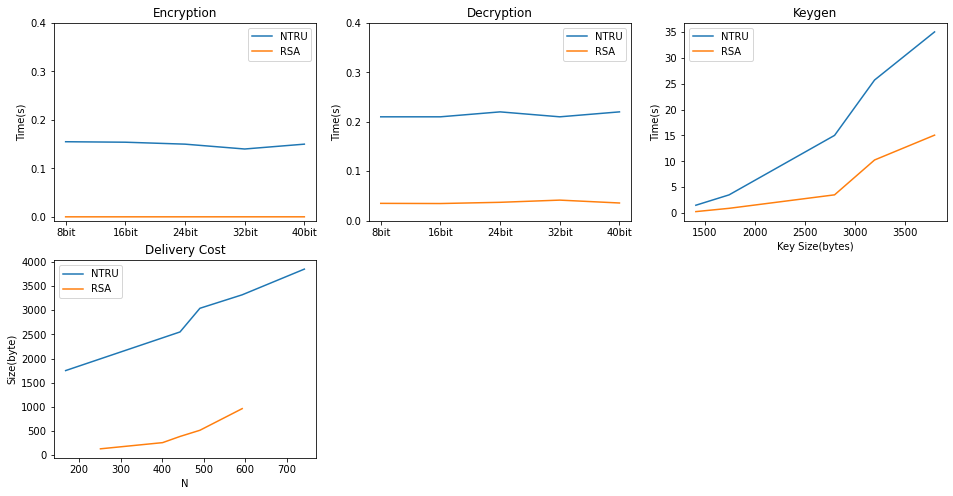

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(2, 3, 1)
plt.plot(BitSize, TimesEnc_NTRU, label="NTRU")
plt.plot(BitSize, TimesEnc_RSA, label="RSA")
plt.title("Encryption")
plt.ylabel("Time(s)") # y label
plt.xticks(BitSize, values)
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(BitSize, TimesDec_NTRU, label="NTRU")
plt.plot(BitSize, TimesDec_RSA, label="RSA")
plt.title("Decryption")
plt.ylabel("Time(s)") # y label
plt.xticks(BitSize, values)
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(keySize, Timekeygen_NTRU, label="NTRU")
plt.plot(keySize, Timeskeygen_RSA, label="RSA")
plt.title("Keygen")
plt.xlabel("Key Size(bytes)") 
plt.ylabel("Time(s)") 
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(N_NTRU, hPluscipher_NTRU, label="NTRU")
plt.plot(N_RSA, Deliver_RSA, label="RSA")
plt.title("Delivery Cost")
plt.xlabel("N")
plt.ylabel("Size(byte)") # y label
plt.legend()
'''
plt.subplot(2, 3, 5)
plt.plot(N_NTRU, TotalSize_NTRU, label="NTRU")
plt.plot(N_RSA, TotalSize_RSA, label="RSA")
plt.title("Total key size")
plt.xlabel("N")
plt.ylabel("Size(byte)") # y label
plt.legend()
'''
plt.savefig('result-ntru-rsa.png')
plt.show()